In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
#read dataset
missing_val=['?']
df=pd.read_csv('adult.csv',na_values=missing_val)

<h1>THE ADULT DATASET</h1><br>
The information is a replica of the notes for the abalone dataset from the UCI repository.<br>

<b>1. Sources:</b> <br>
  (a) Original owners of database 
    US Census Bureau. 

  (b) Donor of database  
    Ronny Kohavi and Barry Becker, 
    Data Mining and Visualization 
    Silicon Graphics. 
    e-mail: ronnyk@sgi.com 

  (c) Date received 
    05/19/96 
    
<b>2. Shape of data:</b><br>
   48842 rows and 15 columns
   
<b>3. Number of Attributes: </b><br>
   6 continuous, 8 nominal attributes. 
   
<b>4. Attribute Information:</b> <br>
   <ul>
    <li>age: continuous. </li>
   <li>workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.</li>
   <li>fnlwgt: continuous.</li>
   <li>education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-    4th,   10th, Doctorate, 5th-6th, Preschool. </li>
   <li>education-num: continuous. </li>
   <li>marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.</li> 
   <li>occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-            op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. </li>
   <li>relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. </li>
   <li>race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. </li>
   <li>sex: Female, Male. </li>
   <li>capital-gain: continuous.</li>
   <li>capital-loss: continuous. </li>
   <li>hours-per-week: continuous.</li> 
   <li>native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan,           Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland,           France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand,         Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. </li>
   <li>class: >50K, <=50K </li>
   </ul>
<b>5. Missing Attribute Values:</b> <br>
   7% have missing values.
   
<b>6. Class Distribution:</b><br> 
   Probability for the label '>50K' : 23.93% / 24.78% (without unknowns) 
   Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns) 

<h2>Objective</h2>
The main objective of this dataset is to predict if a person falls in the income category below 50 thousand dollars or above 50 thousand dollars depending upon the factors like maritial-status,workclass,education,etc. 
 
 

In [96]:
#display first 5 rows of dataset
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [97]:
#check dimensionality of dataset
df.shape

(48842, 15)

In [98]:
#basic statistical analysis of the numerical columns
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [99]:
#counting of missing values in particular column
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [100]:
#remove rows containing missing values
df.dropna(axis=0,how='any',inplace=True)

In [101]:
#after removal of rows containing missing values
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [102]:
#to remove fnlwgt column
df.drop('fnlwgt',axis=1,inplace=True)

In [103]:
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


# Univariate analysis
<h2>1.Boxplot<h2>

{'whiskers': [<matplotlib.lines.Line2D at 0x17cfbe91388>,
 'caps': [<matplotlib.lines.Line2D at 0x17cfbe91c48>,
 'boxes': [<matplotlib.lines.Line2D at 0x17cfbe54508>],
 'medians': [<matplotlib.lines.Line2D at 0x17cfbe94bc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x17cfbe99a48>],
 'means': []}

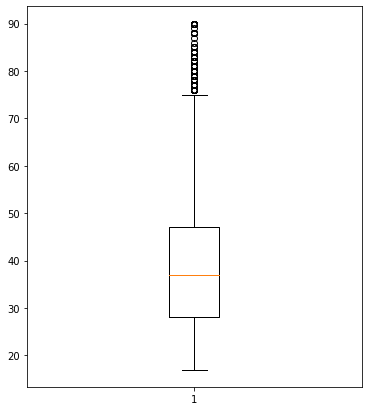

In [15]:
#boxplot for age column
plt.figure(figsize=(6,7))
plt.boxplot(df['age'])

<h3>Observations:</h3><br>
1.75% of working people are of age less than 48.<br>
2.median of 'age' is 37.<br>
3.Some outliers are present in this data between age of 78 and 90.<br>

{'whiskers': [<matplotlib.lines.Line2D at 0x17cfbef75c8>,
 'caps': [<matplotlib.lines.Line2D at 0x17cfbef7f48>,
 'boxes': [<matplotlib.lines.Line2D at 0x17cfbef3a48>],
 'medians': [<matplotlib.lines.Line2D at 0x17cfbefe808>],
 'fliers': [<matplotlib.lines.Line2D at 0x17cfbefef08>],
 'means': []}

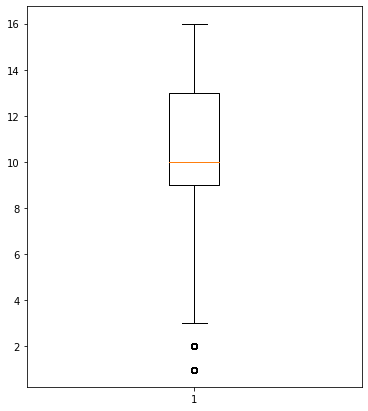

In [16]:
#boxplot for educational-num column
plt.figure(figsize=(6,5))
plt.boxplot(df['educational-num'])

<h3>Observation:</h3><br>
1.Their are less outliers.<br>
2.Majority of density of education lie between 9 to 13<br>

{'whiskers': [<matplotlib.lines.Line2D at 0x17cfc09f8c8>,
 'caps': [<matplotlib.lines.Line2D at 0x17cfc09ff88>,
 'boxes': [<matplotlib.lines.Line2D at 0x17cfc001ec8>],
 'medians': [<matplotlib.lines.Line2D at 0x17cfc0a5fc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x17cfc0a5c88>],
 'means': []}

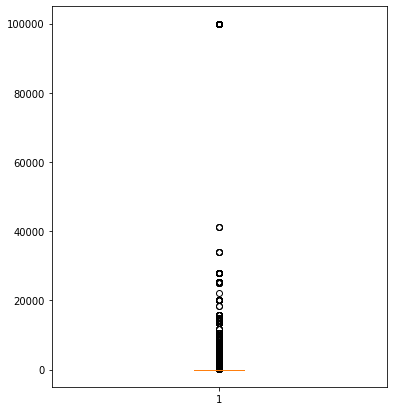

In [19]:
#boxplot for capital-gain column
plt.figure(figsize=(6,7))
plt.boxplot(df['capital-gain'])

<h3>Observation:</h3><br>
Their are less number of people those are getting profit or gain and hence their are larger number of outliers present.

{'whiskers': [<matplotlib.lines.Line2D at 0x17cfc1027c8>,
 'caps': [<matplotlib.lines.Line2D at 0x17cfc102e08>,
 'boxes': [<matplotlib.lines.Line2D at 0x17cfc0fbf48>],
 'medians': [<matplotlib.lines.Line2D at 0x17cfc109d48>],
 'fliers': [<matplotlib.lines.Line2D at 0x17cfc109e48>],
 'means': []}

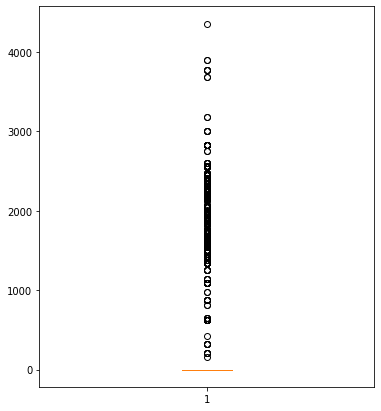

In [20]:
#boxplot for capital-loss column
plt.figure(figsize=(6,7))
plt.boxplot(df['capital-loss'])

<h3>Observation:</h3><br>
Their are less number of people those are getting loss and hence their are larger number of outliers present.

{'whiskers': [<matplotlib.lines.Line2D at 0x17cfc163d48>,
 'caps': [<matplotlib.lines.Line2D at 0x17cfc163ec8>,
 'boxes': [<matplotlib.lines.Line2D at 0x17cfc129448>],
 'medians': [<matplotlib.lines.Line2D at 0x17cfc169b08>],
 'fliers': [<matplotlib.lines.Line2D at 0x17cfc16dbc8>],
 'means': []}

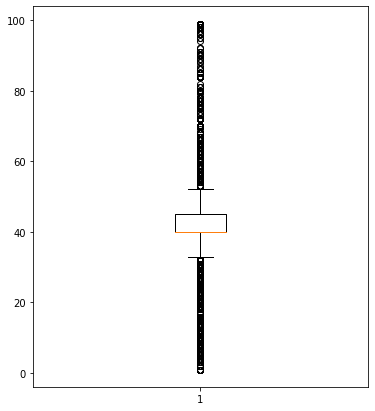

In [21]:
#boxplot for hours-per-week column
plt.figure(figsize=(6,7))
plt.boxplot(df['hours-per-week'])

<h3>Observation:</h3><br>
Most of the people work between 35-55 hours per week.

<h2>2.Frequency distribution(for categorical columns)</h2>

(0, 40000)

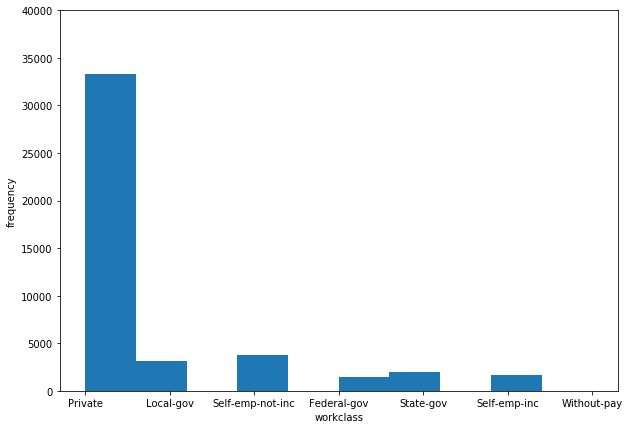

In [53]:
#histogram for workclass column
plt.figure(figsize=(10,7))
plt.hist(df['workclass'])
plt.xlabel('workclass')
plt.ylabel('frequency')
plt.ylim([0,40000])

<h3>Observations:</h3><br>
1.Maximum no: of people work in private sectors.<br>
2.No-one works in without paid jobs<br>
3.least no: of people work under the federal-gov class.<br>
4.Workclass attribute has 7 categories.<br>

(0, 18000)

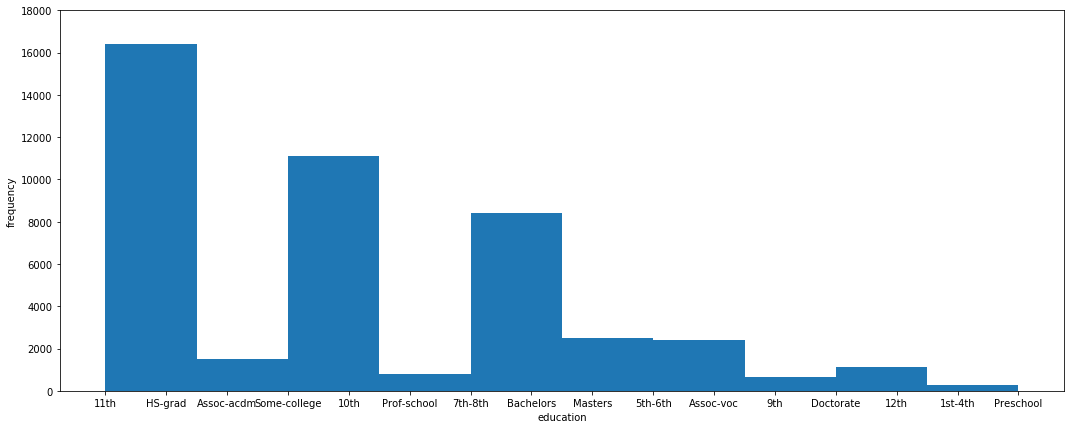

In [55]:
#histogram for education column
plt.figure(figsize=(18,7))
plt.hist(df['education'])
plt.xlabel('education')
plt.ylabel('frequency')
plt.ylim([0,18000])

<h3>Observations:</h3><br>
1.maximum working people has qualified 11th class and HS-graduation.<br>
2.Only few working people has qualification of pre-school or 1st-4th standard.<br>
3.Education attribute has 16 different categories.<br>

(0, 25000)

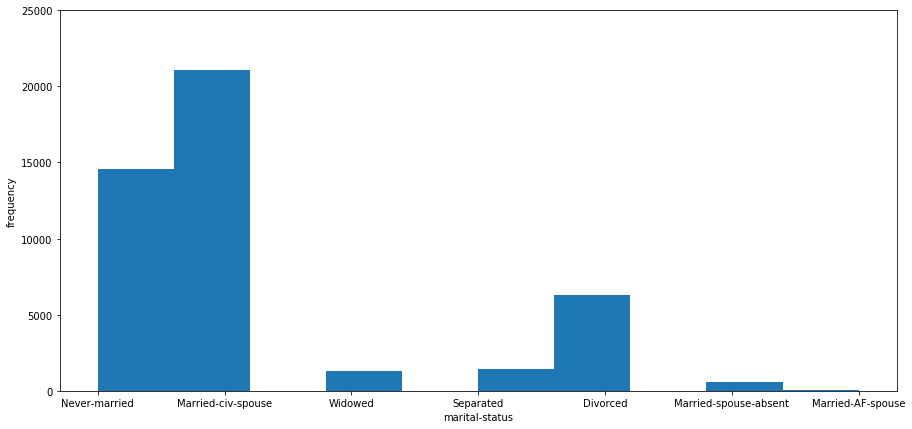

In [54]:
#histogram for marital-status column
plt.figure(figsize=(15,7))
plt.hist(df['marital-status'])
plt.xlabel('marital-status')
plt.ylabel('frequency')
plt.ylim([0,25000])

<h3>Observations:</h3><br>
1.Maximum working people are married-civ-spouse.<br>
2.Least working people belongs to married-AF-spouse.<br>
3.Marital-status attribute has 7 categories.

(0, 16000)

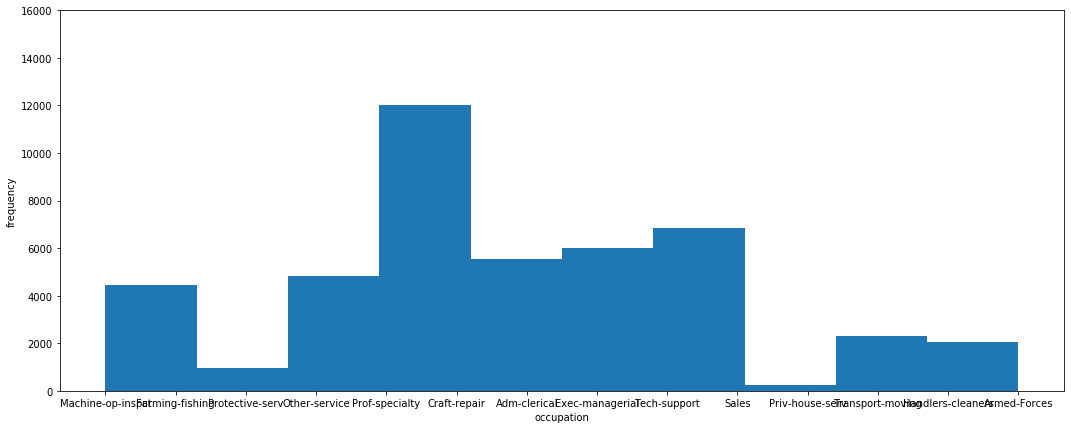

In [56]:
#histogram for occupation column
plt.figure(figsize=(18,7))
plt.hist(df['occupation'])
plt.xlabel('occupation')
plt.ylabel('frequency')
plt.ylim([0,16000])

<h3>Observation:</h3><br>
1.The occupation of adults are more in prof-specialty as compared to others.<br>
2.The armed forces has the least number of working people.<br>
3.Their are 14 different categories in occupation attribute.

(0, 20000)

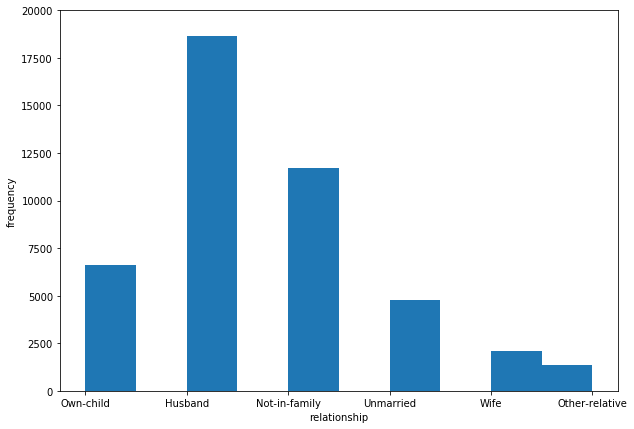

In [57]:
#histogram for relationship column
plt.figure(figsize=(10,7))
plt.hist(df['relationship'])
plt.xlabel('relationship')
plt.ylabel('frequency')
plt.ylim([0,20000])

<h3>Observation:</h3><br>
1.Most working people are husband and other-relations has the least no: of working people.<br>
2.Their are 6 categories under this attribute.

Text(0, 0.5, 'frequency')

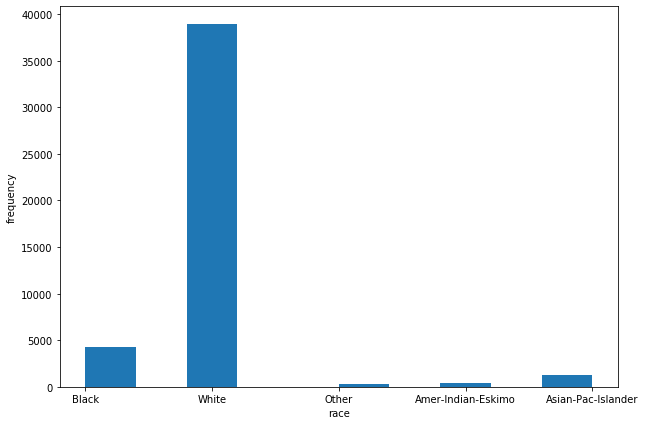

In [58]:
#histogram for race column
plt.figure(figsize=(10,7))
plt.hist(df['race'])
plt.xlabel('race')
plt.ylabel('frequency')

<h3>Observation:</h3><br>
 1.Majority of the working adults belongs to the white category.<br>
 2.Race attribute has 5 categories.

Text(0, 0.5, 'frequency')

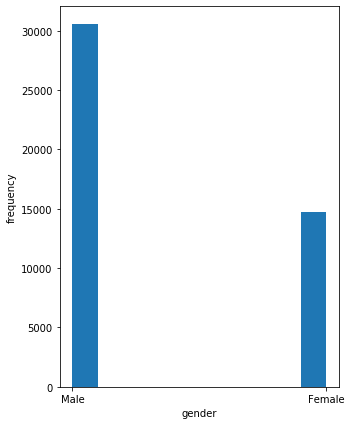

In [17]:
#histogram for gender column
plt.figure(figsize=(5,7))
plt.hist(df['gender'])
plt.xlabel('gender')
plt.ylabel('frequency')

<h3>Observation:</h3><br>
1.Male working adults are in greater number as compared to female.<br>
2.Gender attribute has 2 unique categories, male and female.

Text(0, 0.5, 'frequency')

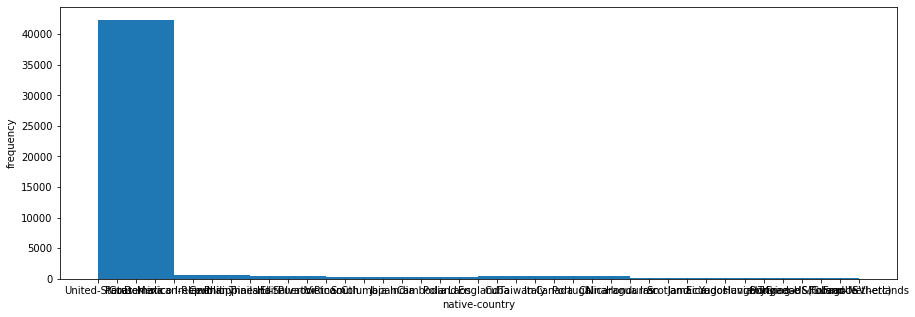

In [19]:
#histogram for native-country column
plt.figure(figsize=(15,5))
plt.hist(df['native-country'])
plt.xlabel('native-country')
plt.ylabel('frequency')

In [20]:
df['native-country'].value_counts()

United-States                 41292
Mexico                          903
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador                     

<h3>Observation:</h3><br>
1.Most of working adults belong to United States(41292).<br>
2.The native-country attribute has total 41 different categories or countries.

(array([34014.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 11208.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

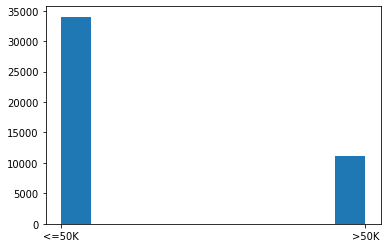

In [59]:
#histogram for income column
plt.hist(df['income'])
plt.xlabel('income')
plt.ylabel('frequency')

<h3>Observation:</h3><br>
Majority of working people has income less than or equal to 50,000dollarrs.Only few people has income greater than 50000dollars.

<h2>3.Probability and frequency distribution(for numerical columns)</h2>

Text(0, 0.5, 'frequency')

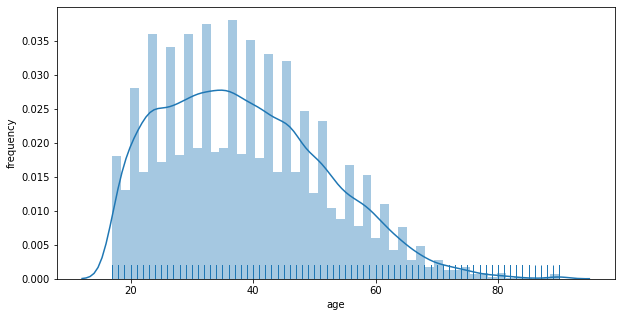

In [24]:
#age column
plt.figure(figsize=[10,5])
sns.distplot(df['age'],rug=True)
plt.ylabel('frequency')

<h3>Observation:</h3><br>
1.Minimum and maximum age of people is 17 and 90.<br>
2.Age attribute is not symmetric hence it is positive skewed curve.<br>
3.Age between 22-38 has greater frequency of working adults. <br>

Text(0, 0.5, 'frequency')

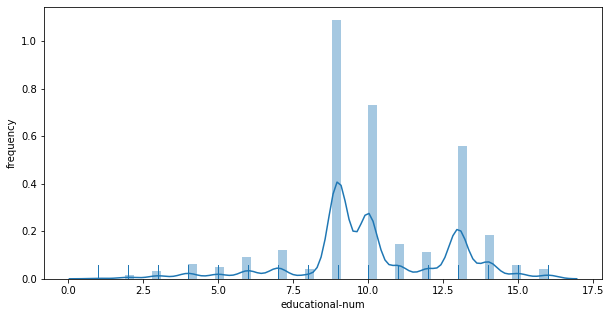

In [26]:
#educational-num column
plt.figure(figsize=[10,5])
sns.distplot(df['educational-num'],rug=True)
plt.ylabel('frequency')

<h3>Observation:</h3><br>
We can observe that the frequency is greater in 9 .<br>
No symmetry can be observed in this plot.

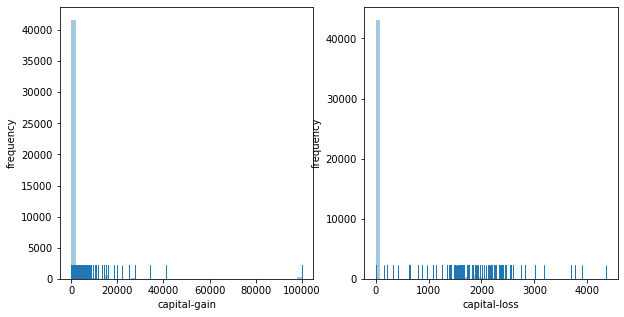

In [42]:
#capital-gain and capital-loss columns
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
sns.distplot(df['capital-gain'],kde=False,rug=True)
plt.ylabel('frequency')
plt.subplot(1,2,2)
sns.distplot(df['capital-loss'],kde=False,rug=True)
plt.ylabel('frequency')
plt.show()

<h3>Observation:</h3><br>
1.Capital-gain and capital-loss of maximum people is 0.<br>
2.The maximum profit or capital-gain is 100000 and maximum loss is approx.4500

Text(0, 0.5, 'frequency')

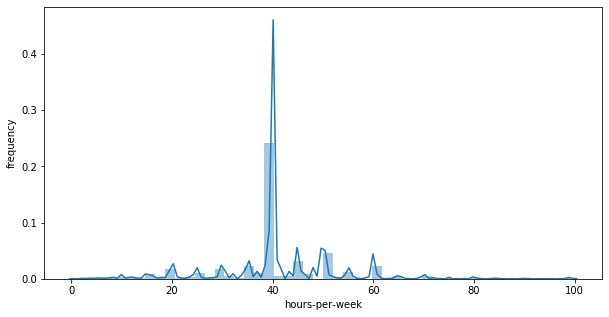

In [43]:
#hours-per-week column
plt.figure(figsize=[10,5])
sns.distplot(df['hours-per-week'])
plt.ylabel('frequency')

<h3>Observation:</h3><br>
1.More number of people work around 40 hours-per-week,as well as 40 is the maximum hours-per-week a person works.<br>
2.The working hours per week lies between the range of 1-100.<br>

# Bivariate analysis

<h2>Among numerical columns</h2>

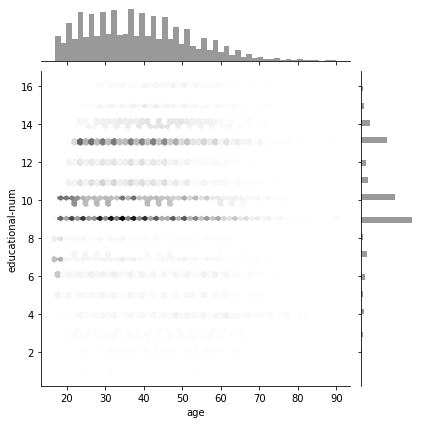

In [15]:
#hexbin plot among age and educational-num column
sns.jointplot(x='age', y='educational-num', data=df, kind='hex', color='k')

<h3>Observation:</h3><br>
Maximum of working people lie in the age between 25-50 and most of them had the graduation year of 11th and 9th.

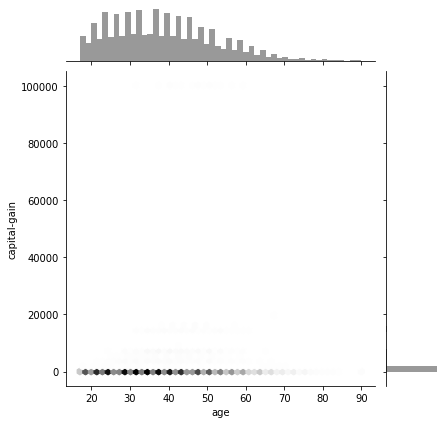

In [18]:
#hexbin plot among age and capital-gain column
sns.jointplot(x='age', y='capital-gain', data=df, kind='hex', color='k')

<h3>Observation:</h3><br>
most working adults lie in age between 20-50 ,almost among of them had 0 capital-gain.

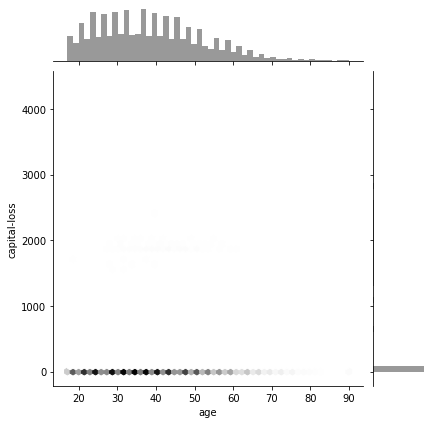

In [19]:
#hexbin plot among age and capital-loss column
sns.jointplot(x='age', y='capital-loss', data=df, kind='hex', color='k')

<h3>Observation:</h3><br>
Most working people lie in age between 20-50 ,almost among of them had 0 capital-loss.

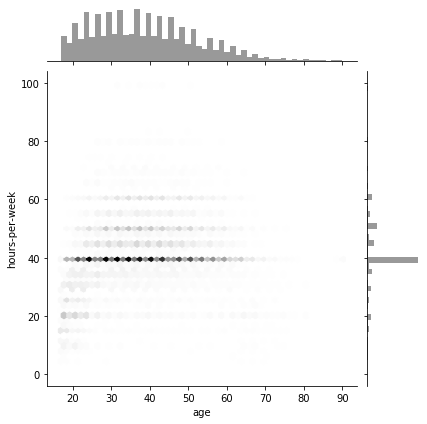

In [20]:
#hexbin plot among age and hours-per-week column
sns.jointplot(x='age', y='hours-per-week', data=df, kind='hex', color='k')

<h3>Observation:</h3><br>
Most of working adults lie in between 20-50age and they have been working 40 hours-per-week.

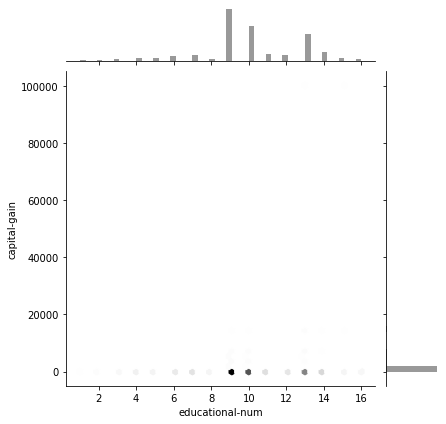

In [21]:
#hexbin plot among educational-num and capital-gain column
sns.jointplot(x='educational-num', y='capital-gain', data=df, kind='hex', color='k')

<h3>Observation:</h3><br>
Maximum of working adults has 9th year of education and they have 0 capital-gain.

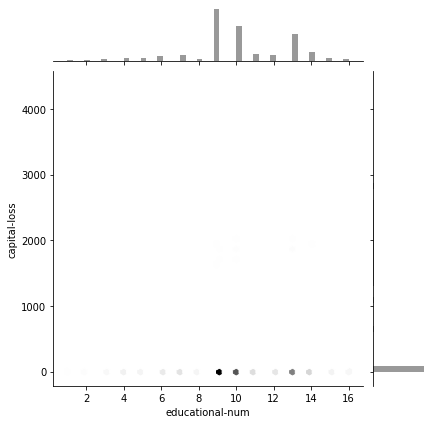

In [22]:
#hexbin plot among educational-num and capital-loss column
sns.jointplot(x='educational-num', y='capital-loss', data=df, kind='hex', color='k')

<h3>Observation:</h3><br>
maximum working adults have 9,10th year of education and they have 0 capital-loss

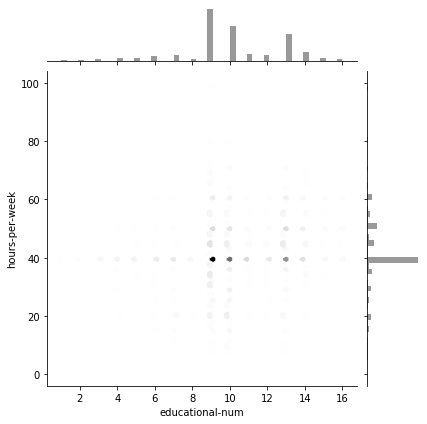

In [23]:
#hexbin plot among educational-num and hours-per-week column
sns.jointplot(x='educational-num', y='hours-per-week', data=df, kind='hex', color='k')

<h3>Observation:</h3><br>
Maximum of working adults has 9th,10th year of education and they work for 40hours per week.

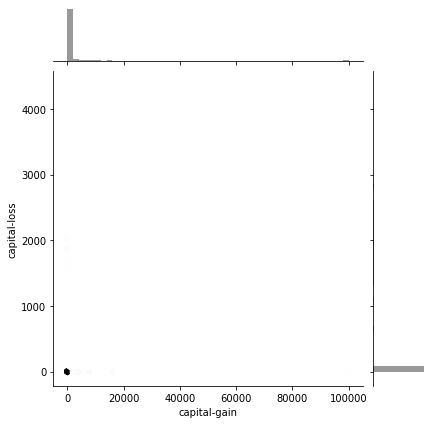

In [24]:
#hexbin plot among capital-gain and capital-loss column
sns.jointplot(x='capital-gain', y='capital-loss', data=df, kind='hex', color='k')

<h3>Observation:</h3><br>
Most of working adults have 0 capital-loss and capital-gain.

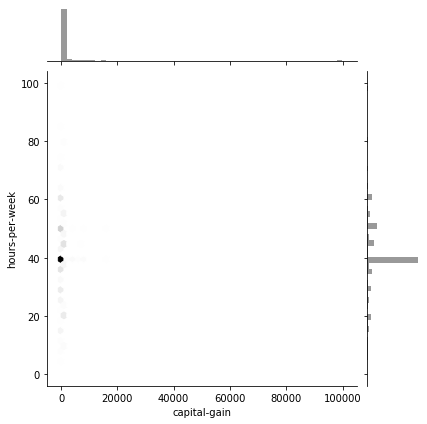

In [25]:
#hexbin plot among capital-gain and hours-per-week column
sns.jointplot(x='capital-gain', y='hours-per-week', data=df, kind='hex', color='k')

<h3>Observation:</h3><br>
Most of working adults have 0 capital gain and they work for 40 hours-per-week.

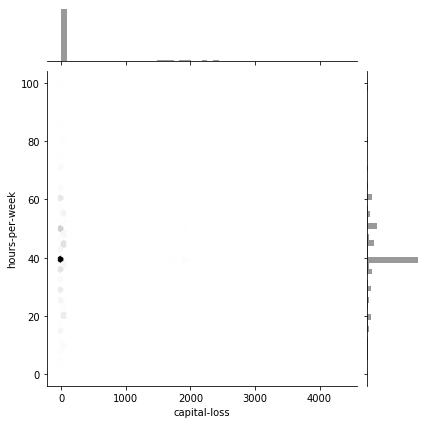

In [26]:
#hexbin plot among capital-loss and hours-per-week column
sns.jointplot(x='capital-loss', y='hours-per-week', data=df, kind='hex', color='k')

<h3>Observation:</h3><br>
Most of the working adults have 0 capital-loss and they work for 40 hours-per-week.

<h2>Between categorical and numerical columns</h2>

In [46]:
df.groupby(['income']).mean()

,age,educational-num,capital-gain,capital-loss,hours-per-week
income,,,,,
<=50K,36.749427,9.630770,149.023402,54.032428,39.372023
>50K,44.006067,11.598501,3991.791667,193.487063,45.690489


In [47]:
df.groupby(['income']).median()

,age,educational-num,capital-gain,capital-loss,hours-per-week
income,,,,,
<=50K,34,9,0,0,40
>50K,43,12,0,0,40


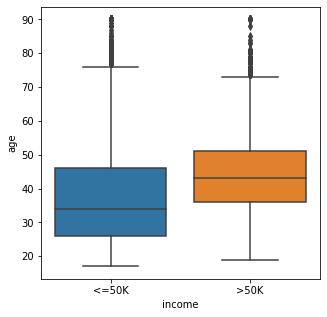

In [48]:
#age(relationship with income)
plt.figure(figsize=[5,5])
sns.boxplot(x='income',y='age', data=df)

<h3>Observation:</h3><br>
From this plot we can observe that average age of people whose income(<=50k) is 34year and those whose income(>50k) is 43year.Outliers are present in both the income category with respect to age.Interquartile range(IQR) for income(<=50K) is 25-46 and for income(>50k) is 36-50.

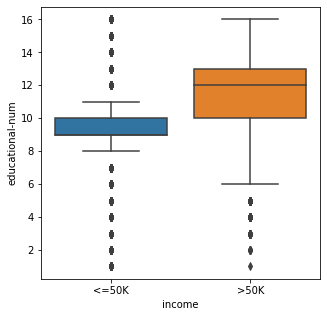

In [49]:
#educational-num(relationship with income)
plt.figure(figsize=[5,5])
sns.boxplot(x='income', y='educational-num', data=df)

<h3>Observation:</h3><br>
1.The education number data is least spread in category of income(<=50k).<br>
2.The outliers are present in both category of income but income(<=50k) has greater number of outliers as compared to income(>50k).<br>
3.The interquratile range(IQR) for income category(<=50k) is between 9-10 and for income category(>50k) is between 10-13.

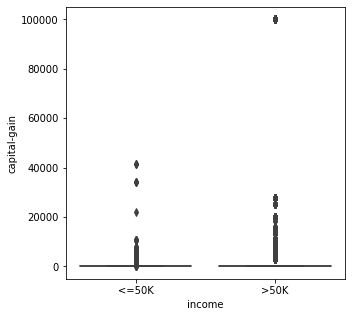

In [50]:
#capital-gain(relationship with income)
plt.figure(figsize=[5,5])
sns.boxplot(x='income', y='capital-gain', data=df)

<h3>Observation:</h3><br>
1.Almost all the values of capital gain are present around 0 for both the categories of income.<<br>
2.Outliers are present in income w.r.t capital-gain attribute.

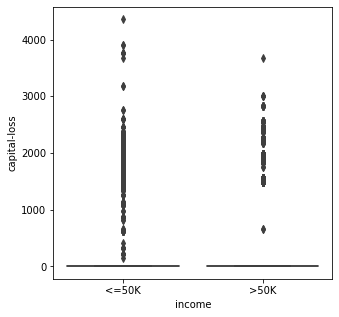

In [51]:
#capital-loss(relationship with income)
plt.figure(figsize=[5,5])
sns.boxplot(x='income', y='capital-loss', data=df)

<h3>Observation:</h3><br>
1.Almost all the values of capital loss are present around 0 for both the categories of income.<br>
2.Outliers are present in income w.r.t capital-gain attribute.

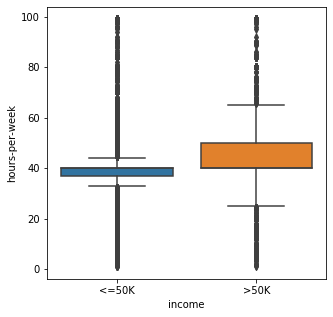

In [52]:
#hours-per-week(relationship with income)
plt.figure(figsize=[5,5])
sns.boxplot(x='income', y='hours-per-week', data=df)

<h3>Observation:</h3><br>
1.The Median of "hours-per-week" for income group who earns >50k is greater than the income group who earns <=50k.<br>
2.Outliers present in both the income group w.r.t. "age" attribute. But more Outliers present in the income group who earns <=50k.<br>
3.For those income group who earns >50k, work for approx 45 hours per week than for those income group who earns <=50k,work for approx 38 hours per week.<br>



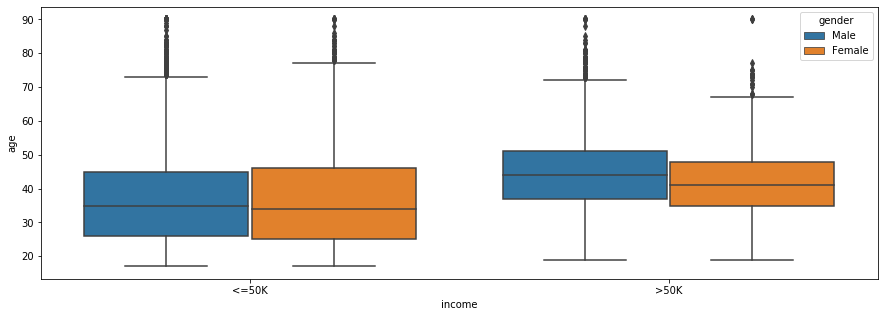

In [56]:
plt.figure(figsize=(15,5))
sns.boxplot(x="income", y="age",hue="gender",data=df)
plt.show()

<h3>Observations:</h3><br>
1.Median "age" of Females who earn less than 50k has very minute difference than the Median "age" of males who earn less than 50k.<br>
2.But the Median "age" of Females who earn greater than 50k has age difference of 2-3years than the Median "age" of males who earn greater than 50k.

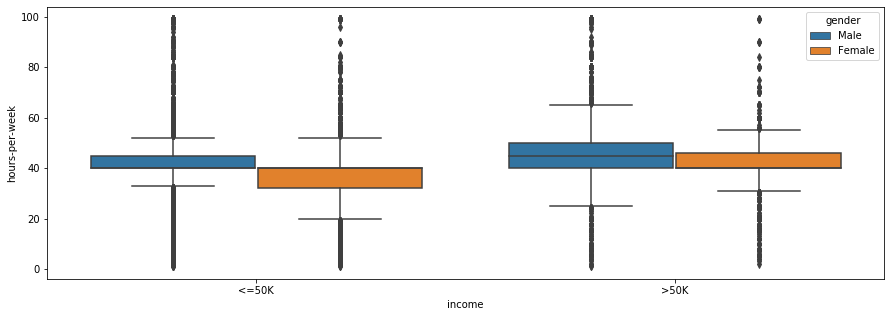

In [57]:
plt.figure(figsize=(15,5))
sns.boxplot(x="income", y="hours-per-week",hue="gender",data=df)
plt.show()

<h3>Observations:</h3><br>
1.The median "hours-per-week" for females is lower than the males in the Income group who earns <=50k.<br>
2.For income category <=50k, males work for around average 40-45hours and females work for around average 35-40 hours whereas for income category >50k,working average hours for both male and female are almost same. 


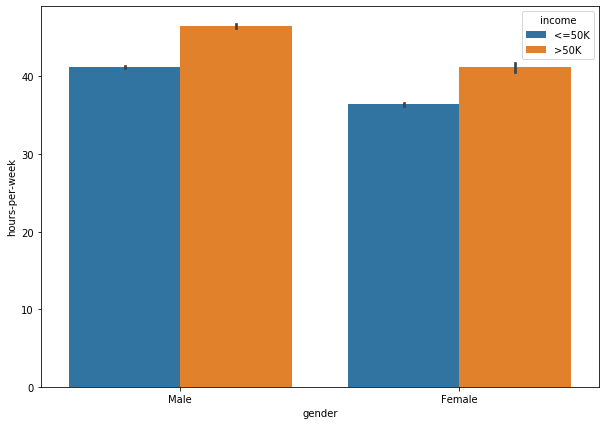

In [22]:
plt.figure(figsize=(10, 7))  
sns.barplot(x='gender', y='hours-per-week', hue='income', data=df)  
plt.show()

<h3>Observations:</h3><br>
From the above plot it is concluded that both male and female works for more hours-per-week for the income >50k.

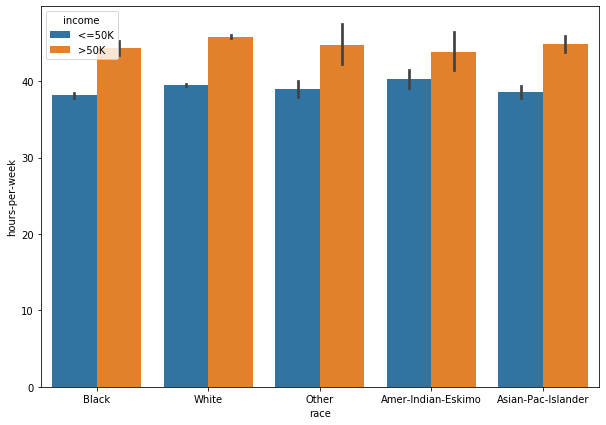

In [28]:
plt.figure(figsize=(10, 7))  
sns.barplot(x='race', y='hours-per-week', hue='income', data=df)  
plt.show()

<h3>Observations:</h3><br>
For every race category people work for more hours to earn income >50k.

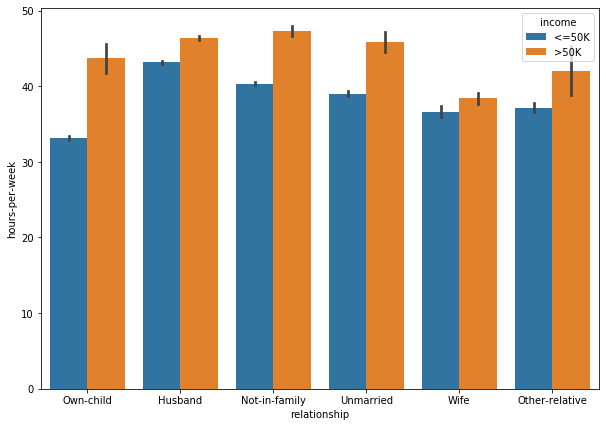

In [24]:
plt.figure(figsize=(10, 7))  
sns.barplot(x='relationship', y='hours-per-week', hue='income', data=df)  
plt.show()

<h3>Observations:</h3><br>
From the above plot we can predict that everyone works for more hours-per-week to earn more income and in case of income <=50k, husbands work for more hours as compared to other relations.

<h2>Conclusion</h2>

1.Generally people are working for 30hours to 40 hours per week.<br>
2.Male working adults are more as compared to females.<br>
3.Females have more flexible working hours per week in the income groups who earns <=50k.<br>
4.Males have more flexible working hours per week in the income groups who earns >50k.<br>
5.Income group who earns >50k have flexible working hours.<br>
6.This dataset not balance , i.e. 76% of them are belong to income group 1 (who earns more than 50k) and 23.93% fall under the income group 0 (who earns less than 50k).<br>
7.People having degree doctorate,prof-school,masters are making salary more than 50K.<br>
8.For "female" earning more than 50k is rare with only 3.62% of all observations.
  But for male, 20.31% of all people earn more than 50k .<br>




In [104]:
"""importing MinMaxScaler from python library called sklearn
MinMaxScaler transforms features by scaling each feature to a given range."""
from sklearn.preprocessing import MinMaxScaler

In [105]:
scaler=MinMaxScaler()
numerical=['age','educational-num','capital-gain','capital-loss','hours-per-week']
data=pd.DataFrame(df)
data[numerical]=scaler.fit_transform(df[numerical])
display(data.head())

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.109589,Private,11th,0.400000,Never-married,Machine-op-inspct,Own-child,Black,Male,0.000000,0.0,0.397959,United-States,<=50K
1,0.287671,Private,HS-grad,0.533333,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.000000,0.0,0.500000,United-States,<=50K
2,0.150685,Local-gov,Assoc-acdm,0.733333,Married-civ-spouse,Protective-serv,Husband,White,Male,0.000000,0.0,0.397959,United-States,>50K
3,0.369863,Private,Some-college,0.600000,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0.076881,0.0,0.397959,United-States,>50K
5,0.232877,Private,10th,0.333333,Never-married,Other-service,Not-in-family,White,Male,0.000000,0.0,0.295918,United-States,<=50K


In [106]:

categorical_feature_mask = df.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = df.columns[categorical_feature_mask].tolist()
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# aliasing labelencoder to le
le = LabelEncoder()
# apply le on categorical feature columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))
df[categorical_cols].head(10)


,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,2,1,4,6,3,2,1,38,0
1,2,11,2,4,0,4,1,38,0
2,1,7,2,10,0,4,1,38,1
3,2,15,2,6,0,2,1,38,1
5,2,0,4,7,1,4,1,38,0
7,4,14,2,9,0,4,1,38,1
8,2,15,4,7,4,4,0,38,0
9,2,5,2,2,0,4,1,38,0
10,2,11,2,6,0,4,1,38,1
11,0,9,2,0,0,4,1,38,0
